In [1]:
import pandas as pd
from datetime import date

In [2]:
current_session = "session_15"

In [3]:
ss = pd.read_csv(f'sessions/{current_session}/{current_session}.csv',
                 parse_dates=['date'], infer_datetime_format=True)
ss.date = pd.to_datetime(ss.date).dt.date
sessions = ss.session.tolist()
session_date = dict(zip(ss.session,ss.date))

C:\Users\Asus\AppData\Local\Temp\ipykernel_10920\208375682.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ss = pd.read_csv(f'sessions/{current_session}/{current_session}.csv',
C:\Users\Asus\AppData\Local\Temp\ipykernel_10920\208375682.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ss = pd.read_csv(f'sessions/{current_session}/{current_session}.csv',


In [4]:
ss.head()

,session,date
0,15-1-1-1,2022-12-19
1,15-1-1-2,2022-12-20
2,15-2-1-1,2023-02-13
3,15-2-1-2,2023-02-14
4,15-2-1-3,2023-02-15


In [10]:
mp = pd.read_csv(f"sessions/{current_session}/mp_{current_session}.csv")
mp.head()

,seat_code,state,seat,mp,current_party
0,P001,Perlis,Padang Besar,RUSHDAN BIN RUSMI,PAS
1,P002,Perlis,Kangar,ZAKRI BIN HASSAN,BERSATU
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS
3,P004,Kedah,Langkawi,MOHD SUHAIMI BIN ABDULLAH,BERSATU
4,P005,Kedah,Jerlun,ABDUL GHANI BIN AHMAD,PAS


In [11]:
mp = mp.dropna() # for situation that dont have enough MPs, such as sesions 14
mp_list = [name.lower().replace(" ", "") for name in mp["mp"].tolist()]
len(mp_list)

222

In [12]:
area_list = [area.lower().replace(" ", "") for area in mp["seat"].tolist()]
area_list[:5]

['padangbesar', 'kangar', 'arau', 'langkawi', 'jerlun']

In [13]:
mp.head(3)

,seat_code,state,seat,mp,current_party
0,P001,Perlis,Padang Besar,RUSHDAN BIN RUSMI,PAS
1,P002,Perlis,Kangar,ZAKRI BIN HASSAN,BERSATU
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS


In [14]:
seat_code = [code for code in mp["seat_code"].tolist()]
seat_code[:5]

['P001', 'P002', 'P003', 'P004', 'P005']

In [102]:
mp_riuh = pd.read_csv(f"sessions/{current_session}/riuh_stats_{current_session}.csv")
attendance = pd.read_csv(f"sessions/{current_session}/attendance_{current_session}.csv")
mp_kelakar = pd.read_csv(f"sessions/{current_session}/gelak_stats_{current_session}.csv")

In [103]:
mp_riuh["total_attendance"] = attendance["total"]
mp_kelakar["total_attendance"] = attendance["total"]

In [104]:
#number of session
n_session = len(mp_riuh.iloc[:,5:-2].columns)

#total riuh satu dewan
sum_riuh = mp_riuh["total_riuh"].sum()

In [105]:
mp_riuh["riuh_%"] = round((mp_riuh["total_riuh"] / sum_riuh * 100),2)
mp_riuh["att_%"] = round((mp_riuh["total_attendance"] / n_session * 100),2)

In [107]:
mp_riuh.head()

,seat_code,state,seat,mp,current_party,2022-12-19,2022-12-20,2023-02-13,2023-02-14,2023-02-15,...,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-04-03,2023-04-04,total_riuh,total_attendance,riuh_%,att_%
0,P001,Perlis,Padang Besar,RUSHDAN BIN RUSMI,PAS,0,0,0,0,0,...,0,0,0,0,1,0,1,33,0.17,100.00
1,P002,Perlis,Kangar,ZAKRI BIN HASSAN,BERSATU,0,0,0,0,0,...,0,0,0,0,0,0,1,33,0.17,100.00
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS,7,3,0,0,1,...,2,2,1,0,4,3,57,33,9.84,100.00
3,P004,Kedah,Langkawi,MOHD SUHAIMI BIN ABDULLAH,BERSATU,0,0,0,0,0,...,0,0,0,0,0,0,2,33,0.35,100.00
4,P005,Kedah,Jerlun,ABDUL GHANI BIN AHMAD,PAS,0,0,0,0,0,...,0,0,0,0,0,0,4,26,0.69,78.79


In [108]:
mp["current_party"].unique()

array(['PAS', 'BERSATU', 'PKR', 'DAP', 'UMNO', 'MIC', 'AMANAH', 'MUDA',
       'MCA', 'Independent', 'KDM', 'WARISAN', 'UPKO', 'GRS', 'STAR',
       'PBRS', 'Barisan Nasional', 'Parti Bersatu Sabah', 'PBB', 'SUPP',
       'PRS', "Sarawak United Peoples' Party",
       'Parti Bansa Dayak Sarawak', 'PDP'], dtype=object)

In [109]:
pn = ['PAS', 'BERSATU']
ph = ['PKR', 'DAP', 'AMANAH', 'MUDA', 'UPKO']
bn = ['UMNO', 'MIC', 'MCA', 'PBRS']

coalition = []
for i in mp_riuh["current_party"]:
    if i in pn:
        coalition.append("Perikatan Nasional")
    elif i in ph:
        coalition.append("Pakatan Harapan")
    elif i in bn:
        coalition.append("Barisan Nasional")
    else:
        coalition.append("Other")


In [110]:
mp_riuh["coalition"] = coalition
mp_kelakar["coalition"] = coalition

In [112]:
to_drop = mp_riuh.columns[5:-5]
mp_riuh = mp_riuh.drop(to_drop, axis=1)

In [113]:
mp_riuh.sort_values(by="total_riuh", ascending=False).head(10)

,seat_code,state,seat,mp,current_party,total_riuh,total_attendance,riuh_%,att_%,coalition
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS,57,33,9.84,100.00,Perikatan Nasional
10,P011,Kedah,Pendang,AWANG BIN HASHIM,PAS,45,30,7.77,90.91,Perikatan Nasional
49,P050,Pulau Pinang,Jelutong,SANISVARA NETHAJI RAYER A/L RAJAJI,DAP,32,33,5.53,100.00,Pakatan Harapan
100,P101,Selangor,Hulu Langat,MOHD SANY HAMZAN,AMANAH,26,33,4.49,100.00,Pakatan Harapan
69,P070,Perak,Kampar,CHONG ZHEMIN,DAP,21,33,3.63,100.00,Pakatan Harapan
137,P138,Melaka,Kota Melaka,KHOO POAY TIONG,DAP,20,33,3.45,100.00,Pakatan Harapan
20,P021,Kelantan,Kota Bharu,TAKIYUDDIN BIN HASSAN,PAS,19,29,3.28,87.88,Perikatan Nasional
32,P033,Terengganu,Besut,CHE MOHAMMAD ZULKIFLY JUSOH,PAS,17,30,2.94,90.91,Perikatan Nasional
99,P100,Selangor,Pandan,MOHD RAFIZI BIN RAMLI,PKR,15,21,2.59,63.64,Pakatan Harapan
42,P043,Pulau Pinang,Bagan,LIM GUAN ENG,DAP,14,33,2.42,100.00,Pakatan Harapan


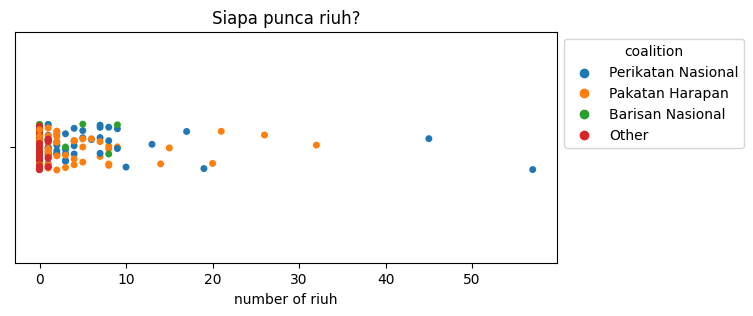

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(7, 3))
ax = sns.stripplot(data=mp_riuh, x="total_riuh", hue="coalition")
# set the axis labels and title
ax.set_xlabel('number of riuh')
ax.set_title('Siapa punca riuh?')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [115]:
mp_kelakar.head()

,seat_code,state,seat,mp,current_party,2022-12-19,2022-12-20,2023-02-13,2023-02-14,2023-02-15,...,2023-03-23,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-04-03,2023-04-04,total_gelak,total_attendance,coalition
0,P001,Perlis,Padang Besar,RUSHDAN BIN RUSMI,PAS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,Perikatan Nasional
1,P002,Perlis,Kangar,ZAKRI BIN HASSAN,BERSATU,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,Perikatan Nasional
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS,0,1,0,0,0,...,1,3,0,0,0,0,5,23,33,Perikatan Nasional
3,P004,Kedah,Langkawi,MOHD SUHAIMI BIN ABDULLAH,BERSATU,0,0,0,0,0,...,0,0,0,0,0,0,0,3,33,Perikatan Nasional
4,P005,Kedah,Jerlun,ABDUL GHANI BIN AHMAD,PAS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,Perikatan Nasional


In [116]:
to_drop = [i for i in mp_kelakar.columns[5:-3]]
mp_kelakar = mp_kelakar.drop(to_drop, axis=1)

In [117]:
mp_kelakar.sort_values(by="total_gelak", ascending=False).head(10)

,seat_code,state,seat,mp,current_party,total_gelak,total_attendance,coalition
2,P003,Perlis,Arau,SHAHIDAN BIN KASSIM,PAS,23,33,Perikatan Nasional
156,P157,Johor,Pengerang,AZALINA BINTI OTHMAN,UMNO,4,24,Barisan Nasional
3,P004,Kedah,Langkawi,MOHD SUHAIMI BIN ABDULLAH,BERSATU,3,33,Perikatan Nasional
100,P101,Selangor,Hulu Langat,MOHD SANY HAMZAN,AMANAH,3,33,Pakatan Harapan
33,P034,Terengganu,Setiu,SHAHARIZUKIRNAIN BIN ABD KADIR,PAS,3,33,Perikatan Nasional
55,P056,Perak,Larut,HAMZAH BIN ZAINUDIN,BERSATU,2,21,Perikatan Nasional
62,P063,Perak,Tambun,ANWAR BIN IBRAHIM,PKR,2,19,Pakatan Harapan
186,P187,Sabah,Kinabatangan,MOKTAR BIN RADIN,UMNO,2,26,Barisan Nasional
148,P149,Johor,Sri Gading,AMINOLHUDA BIN HASSAN,AMANAH,1,33,Pakatan Harapan
95,P096,Selangor,Kuala Selangor,DZULKEFLY BIN AHMAD,AMANAH,1,33,Pakatan Harapan


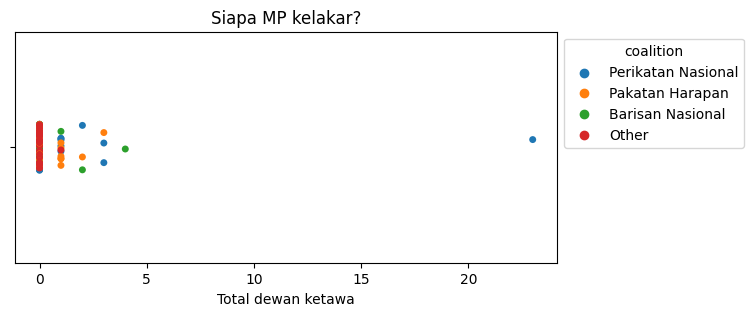

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(7,3))
ax = sns.stripplot(data=mp_kelakar, x="total_gelak", hue="coalition")
# set the axis labels and title
ax.set_xlabel('Total dewan ketawa')
ax.set_title('Siapa MP kelakar?')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()